In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import datetime as dt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("date-hour-soo-dest-2020.csv")

In [3]:
df.head()

,Date,Hour,Origin Station,Destination Station,Trip Count
0,2020-01-01,0,12TH,16TH,5
1,2020-01-01,0,12TH,24TH,3
2,2020-01-01,0,12TH,ASHB,6
3,2020-01-01,0,12TH,BAYF,1
4,2020-01-01,0,12TH,CIVC,3


In [4]:
df['Date']=pd.to_datetime(df['Date'])

In [5]:
df['day']=df['Date'].dt.dayofweek
df['month']=df['Date'].dt.month
df['year']=df['Date'].dt.year

df['weekday']=df['Date'].dt.day_name()
df['month_name']=df['Date'].dt.month_name()

In [6]:
df.head()

,Date,Hour,Origin Station,Destination Station,Trip Count,day,month,year,weekday,month_name
0,2020-01-01,0,12TH,16TH,5,2,1,2020,Wednesday,January
1,2020-01-01,0,12TH,24TH,3,2,1,2020,Wednesday,January
2,2020-01-01,0,12TH,ASHB,6,2,1,2020,Wednesday,January
3,2020-01-01,0,12TH,BAYF,1,2,1,2020,Wednesday,January
4,2020-01-01,0,12TH,CIVC,3,2,1,2020,Wednesday,January


In [7]:
df=df.drop('Date',axis=1)

### Exploratory Data Analysis - EDA

In [8]:
df.sample(6)

,Hour,Origin Station,Destination Station,Trip Count,day,month,year,weekday,month_name
732813,17,19TH,BAYF,75,2,1,2020,Wednesday,January
4019402,19,12TH,SANL,1,6,8,2020,Sunday,August
5123524,11,NBRK,SFIA,1,3,11,2020,Thursday,November
1727250,11,16TH,DELN,1,6,3,2020,Sunday,March
1986448,7,12TH,24TH,2,4,3,2020,Friday,March
1750294,9,UCTY,SANL,2,0,3,2020,Monday,March


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5811863 entries, 0 to 5811862
Data columns (total 9 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   Hour                 int64 
 1   Origin Station       object
 2   Destination Station  object
 3   Trip Count           int64 
 4   day                  int64 
 5   month                int64 
 6   year                 int64 
 7   weekday              object
 8   month_name           object
dtypes: int64(5), object(4)
memory usage: 399.1+ MB


In [10]:
df.describe()

,Hour,Trip Count,day,month,year
count,5.811863e+06,5.811863e+06,5.811863e+06,5.811863e+06,5811863.0
mean,1.352784e+01,5.407264e+00,2.777982e+00,5.936740e+00,2020.0
std,4.925962e+00,1.811828e+01,1.891037e+00,3.676376e+00,0.0
min,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,2020.0
25%,9.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,2020.0
50%,1.400000e+01,2.000000e+00,3.000000e+00,6.000000e+00,2020.0
75%,1.800000e+01,4.000000e+00,4.000000e+00,9.000000e+00,2020.0
max,2.300000e+01,9.250000e+02,6.000000e+00,1.200000e+01,2020.0


In [11]:
df.corr()

,Hour,Trip Count,day,month,year
Hour,1.000000,-0.017611,0.074817,-0.018326,NaN
Trip Count,-0.017611,1.000000,-0.042222,-0.165873,NaN
day,0.074817,-0.042222,1.000000,-0.046301,NaN
month,-0.018326,-0.165873,-0.046301,1.000000,NaN
year,NaN,NaN,NaN,NaN,NaN


In [12]:
df['Trip Count'].value_counts().describe()

count    7.740000e+02
mean     7.508867e+03
std      1.017191e+05
min      1.000000e+00
25%      3.000000e+00
50%      1.700000e+01
75%      1.090000e+02
max      2.500495e+06
Name: Trip Count, dtype: float64

In [13]:
df.isnull().sum()

Hour                   0
Origin Station         0
Destination Station    0
Trip Count             0
day                    0
month                  0
year                   0
weekday                0
month_name             0
dtype: int64

In [14]:
df['Trip Count']=df['Trip Count'].fillna(df['Trip Count'].mode())

In [15]:
df.isnull().sum()

Hour                   0
Origin Station         0
Destination Station    0
Trip Count             0
day                    0
month                  0
year                   0
weekday                0
month_name             0
dtype: int64

In [16]:
float_columns = df.select_dtypes(include=["float"])

In [17]:
float_columns

""
0
1
2
3
4
...
5811858
5811859
5811860
5811861


In [18]:
#df.loc[:, float_columns.columns] = df.loc[:, float_columns.columns].astype("float").fillna(float("NaN"))

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5811863 entries, 0 to 5811862
Data columns (total 9 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   Hour                 int64 
 1   Origin Station       object
 2   Destination Station  object
 3   Trip Count           int64 
 4   day                  int64 
 5   month                int64 
 6   year                 int64 
 7   weekday              object
 8   month_name           object
dtypes: int64(5), object(4)
memory usage: 399.1+ MB


In [20]:
#df = df.replace([np.inf, -np.inf], np.nan).dropna()

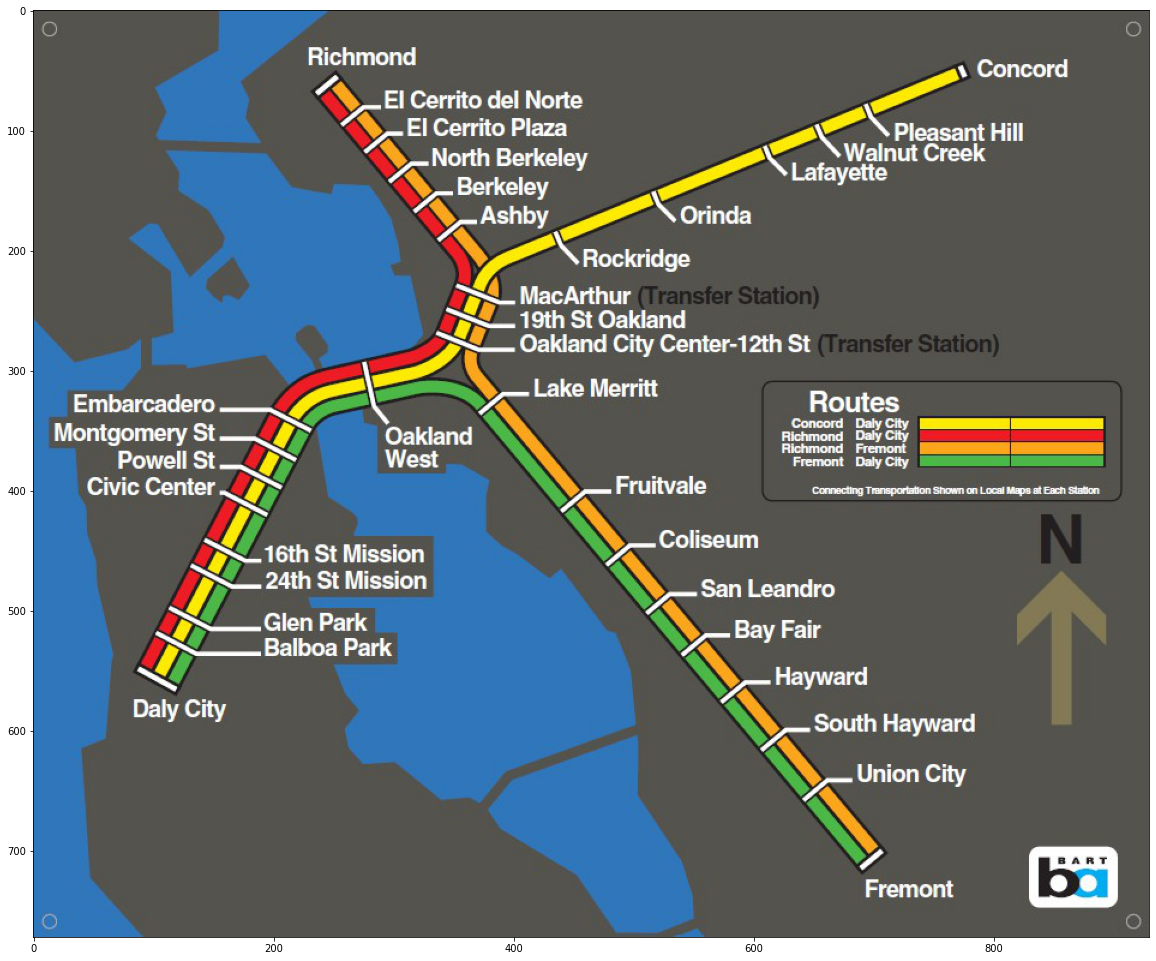

In [21]:
plt.figure(figsize=(20,20))
img=plt.imread('maps4.jpg')
plt.imshow(img)
plt.show();

In [22]:
df['Origin Station'].unique()

array(['12TH', '16TH', '19TH', '24TH', 'ANTC', 'ASHB', 'BALB', 'BAYF',
       'CAST', 'CIVC', 'COLM', 'COLS', 'CONC', 'DALY', 'DBRK', 'DELN',
       'DUBL', 'EMBR', 'FRMT', 'FTVL', 'GLEN', 'HAYW', 'LAFY', 'LAKE',
       'MCAR', 'MLBR', 'MONT', 'NBRK', 'NCON', 'OAKL', 'ORIN', 'PCTR',
       'PHIL', 'PITT', 'PLZA', 'POWL', 'RICH', 'ROCK', 'SANL', 'SBRN',
       'SFIA', 'SHAY', 'SSAN', 'UCTY', 'WARM', 'WCRK', 'WDUB', 'WOAK',
       'BERY', 'MLPT'], dtype=object)

In [23]:
origin_station=pd.read_csv('station_info.csv')

In [24]:
origin_station

,Abbreviation,Description,Location,Name
0,12TH,"1245 Broadway, Oakland CA 94612<br />12th St. ...","-122.271450,37.803768,0",12th St. Oakland City Center (12TH)
1,16TH,"2000 Mission Street, San Francisco CA 94110<br...","-122.419694,37.765062,0",16th St. Mission (16TH)
2,19TH,"1900 Broadway, Oakland CA 94612<br />19th Stre...","-122.268602,37.808350,0",19th St. Oakland (19TH)
3,24TH,"2800 Mission Street, San Francisco CA 94110<br...","-122.418143,37.752470,0",24th St. Mission (24TH)
4,ASHB,"3100 Adeline Street, Berkeley CA 94703<br />As...","-122.270062,37.852803,0",Ashby (ASHB)
5,BALB,"401 Geneva Avenue, San Francisco CA 94112<br /...","-122.447506,37.721585,0",Balboa Park (BALB)
6,BAYF,"15242 Hesperian Blvd., San Leandro CA 94578<br...","-122.126514,37.696924,0",Bay Fair (BAYF)
7,CAST,"3301 Norbridge Dr., Castro Valley CA 94546<br ...","-122.075602,37.690746,0",Castro Valley (CAST)
8,CIVC,"1150 Market Street, San Francisco CA 94102<br ...","-122.414123,37.779732,0",Civic Center/UN Plaza (CIVC)
9,COLS,"7200 San Leandro St., Oakland CA 94621<br />We...","-122.196869,37.753661,0",Coliseum/Oakland Airport (COLS)


### Data Visualization

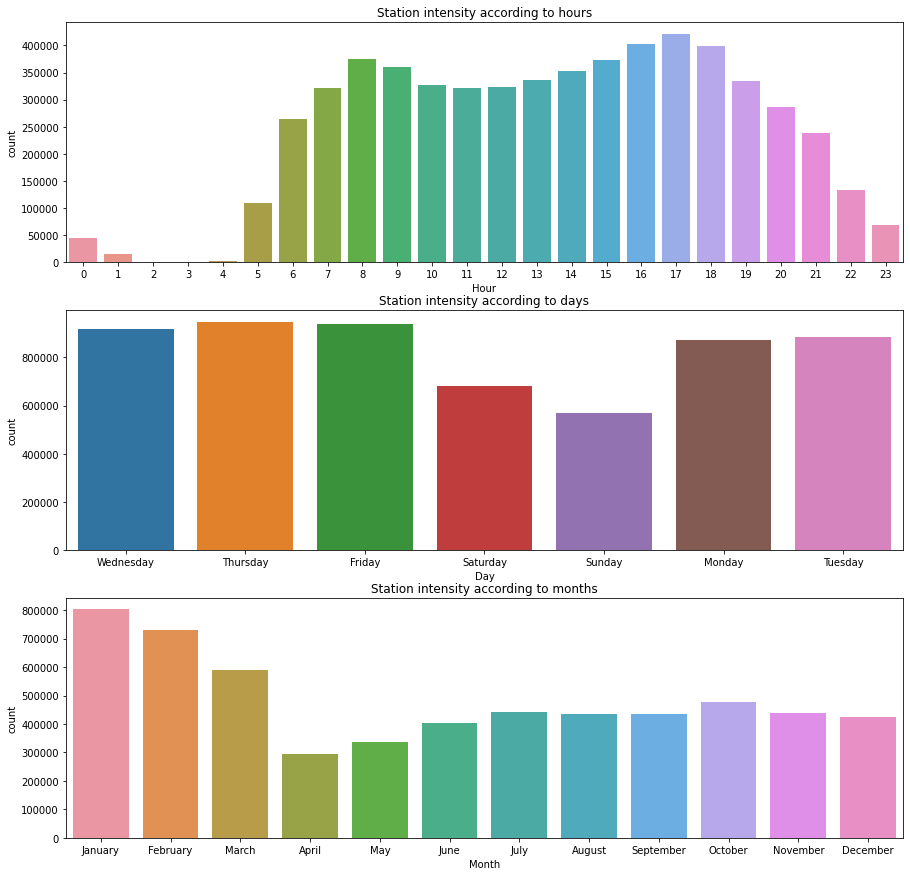

In [25]:
fig=plt.figure(figsize=(15,15))
ax=fig.add_subplot(3,1,1)
ax=sns.countplot(df['Hour'])
ax.set_title('Station intensity according to hours')

bx=fig.add_subplot(3,1,2)
bx=sns.countplot(df['weekday'])
bx.set_title('Station intensity according to days')
bx.set_xlabel('Day')

cx=fig.add_subplot(3,1,3)
cx=sns.countplot(df['month_name'])
cx.set_title('Station intensity according to months')
cx.set_xlabel('Month');

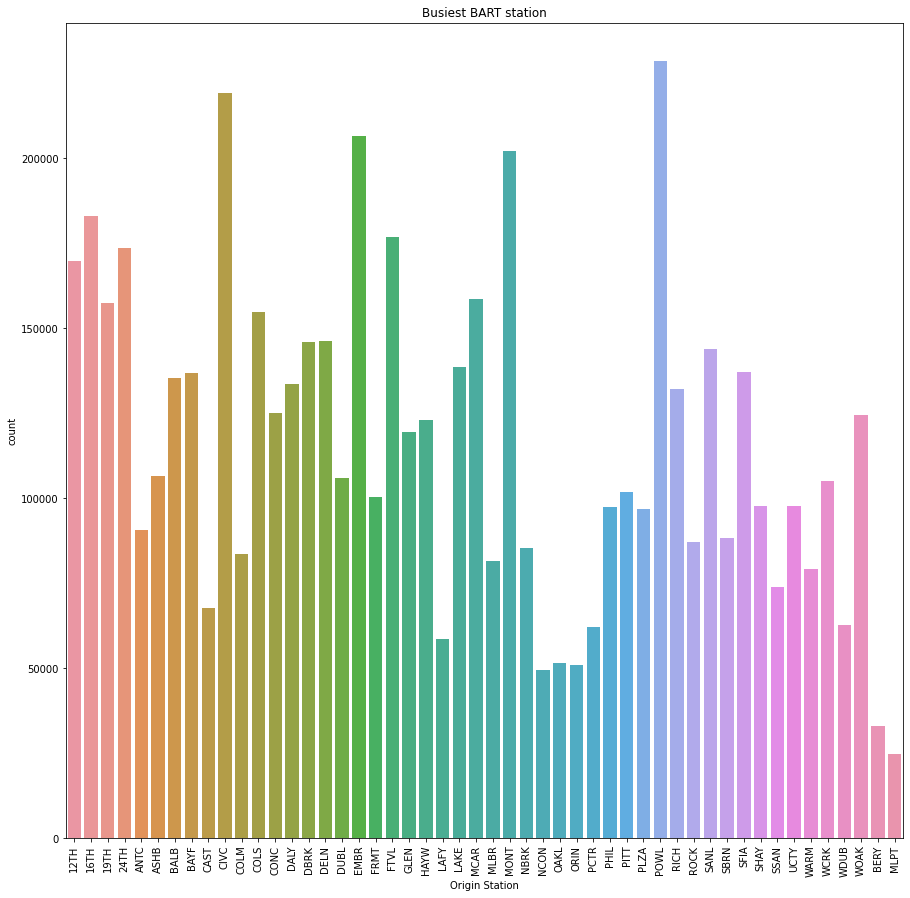

In [26]:
fig=plt.figure(figsize=(15,15))
ax=sns.countplot(df['Origin Station'])
ax.set_title('Busiest BART station')
ax.set_xlabel('Origin Station')
plt.xticks(rotation=90);

In [27]:
x=df[['day']]
y=df['Trip Count']

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression


In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

In [30]:
lr=LinearRegression()
pred=lr.fit(x_train,y_train).predict(x_test)

In [31]:
mean_squared_error(y_test,pred)**.5

18.118717808823153

In [32]:
r2_score(y_test,pred)

0.0017877038055135186